In [2]:
import numpy as np
import pandas as pd

In [3]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')
sample_set=pd.read_csv('sample.csv')

In [70]:
print(train_set.shape)
print(test_set.shape)
print(sample_set.shape)
train_set.sample(5)

(1200000, 20)
(800000, 19)
(800000, 2)


id   Age  Gender  Annual Income Marital Status  \
936992    936992  45.0  Female        81760.0       Divorced   
194449    194449  57.0    Male         5425.0        Married   
785533    785533  24.0  Female         2772.0         Single   
1117253  1117253  38.0    Male         8892.0         Single   
93255      93255  37.0    Male       121710.0       Divorced   

         Number of Dependents Education Level     Occupation  Health Score  \
936992                    4.0        Master's            NaN     22.360154   
194449                    NaN     High School  Self-Employed     37.353035   
785533                    3.0             PhD            NaN     19.014080   
1117253                   1.0     High School            NaN     11.811840   
93255                     2.0        Master's     Unemployed           NaN   

         Location    Policy Type  Previous Claims  Vehicle Age  Credit Score  \
936992   Suburban        Premium              2.0         10.0           NaN   
194449      Urban  Comprehensive              3.0          5.0         657.0   
785533   Suburban  Comprehensive              NaN         17.0         609.0   
1117253  Suburban  Comprehensive              1.0          3.0           NaN   
93255       Urban        Premium              2.0          5.0         774.0   

         Insurance Duration Customer Feedback Smoking Status  \
936992                  7.0              Good            Yes   
194449                  2.0              Poor            Yes   
785533                  7.0              Good             No   
1117253                 5.0           Average            Yes   
93255                   4.0           Average            Yes   

        Exercise Frequency Property Type  Premium Amount  
936992               Daily         Condo            30.0  
194449              Rarely     Apartment            25.0  
785533             Monthly         Condo          3046.0  
1117253             Rarely     Apartment          1495.0  
93255                Daily         Condo          1590.0

#DATA UNDERSTANDING

In [5]:
train_set.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [7]:
(train_set.isnull().mean()*100) # percentage of data missing for each column

id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Occupation              29.839583
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64

In [8]:
train_set.describe()/10

id            Age  Annual Income  Number of Dependents  \
count  120000.000000  118129.500000  115505.100000         109032.800000   
mean    59999.950000       4.114556    3274.521778              0.200993   
std     34641.030585       1.353995    3217.950612              0.141734   
min         0.000000       1.800000       0.100000              0.000000   
25%     29999.975000       3.000000     800.100000              0.100000   
50%     59999.950000       4.100000    2391.100000              0.200000   
75%     89999.925000       5.300000    4463.400000              0.300000   
max    119999.900000       6.400000   14999.700000              0.400000   

        Health Score  Previous Claims    Vehicle Age   Credit Score  \
count  112592.400000     83597.100000  119999.400000  106211.800000   
mean        2.561391         0.100269       0.956989      59.292435   
std         1.220346         0.098284       0.577619      14.998195   
min         0.201224         0.000000       0.000000      30.000000   
25%         1.591896         0.000000       0.500000      46.800000   
50%         2.457865         0.100000       1.000000      59.500000   
75%         3.452721         0.200000       1.500000      72.100000   
max         5.897591         0.900000       1.900000      84.900000   

       Insurance Duration  Premium Amount  
count       119999.900000   120000.000000  
mean             0.501822      110.254482  
std              0.259433       86.499886  
min              0.100000        2.000000  
25%              0.300000       51.400000  
50%              0.500000       87.200000  
75%              0.700000      150.900000  
max              0.900000      499.900000

In [9]:
train_set.duplicated().sum()

0

In [10]:
numerical_columns = train_set.select_dtypes(include=[np.number]) # dropping the non numeric coulumns
numerical_columns.corr()['Premium Amount']

id                     -0.000292
Age                    -0.002430
Annual Income          -0.012390
Number of Dependents   -0.000976
Health Score            0.014704
Previous Claims         0.046874
Vehicle Age             0.000391
Credit Score           -0.026014
Insurance Duration     -0.000028
Premium Amount          1.000000
Name: Premium Amount, dtype: float64

In [11]:
# relation related column - > Annual Income , Health Score , Previous Claims(*) , Credit Score 

In [12]:
# removing Policy Start Date as it has no relevance with the Premium Amount
train_set.drop('Policy Start Date' , axis=1 , inplace =True)
test_set.drop('Policy Start Date' , axis=1 , inplace =True)

In [13]:
print(train_set.shape)
print(test_set.shape)

(1200000, 20)
(800000, 19)


In [14]:
train_set.nunique()

id                      1200000
Age                          47
Gender                        2
Annual Income             88593
Marital Status                3
Number of Dependents          5
Education Level               4
Occupation                    3
Health Score             532657
Location                      3
Policy Type                   3
Previous Claims              10
Vehicle Age                  20
Credit Score                550
Insurance Duration            9
Customer Feedback             3
Smoking Status                2
Exercise Frequency            4
Property Type                 3
Premium Amount             4794
dtype: int64

In [15]:
#Categorical Data -> Gender , Martial Status , Number of Dependents , Education Level  , occupation , Location , Smoking Status , Exercise Fequency , Property Type 

In [16]:
#PANDAS PROFILING
# !pip install ydata-profiling

In [17]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(train_set,title="Report")
# profile.to_file("output.html")

In [18]:
# http://localhost:8888/edit/ML%20PROJECT/output.html

In [19]:
#EDA 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

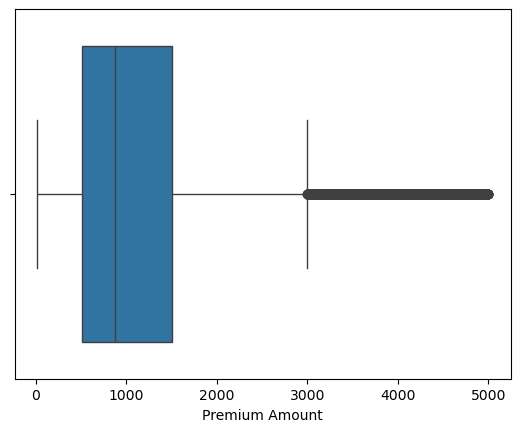

In [20]:
sns.boxplot(x=train_set['Premium Amount'])
plt.show()

In [21]:
def calculate_missing_percentage(data):
    """
    Calculate the percentage of missing values for each column in the dataset.
    """
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    return missing_percentage.round(2)

def plot_missing_percentage(missing_percentage, title="Percentage of Missing Values by Column"):
    """
    Plot the percentage of missing values for each column as a horizontal bar chart.
    """
    missing_percentage.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor="black", linewidth=1.0)
    plt.title(title)
    plt.xlabel('Percentage')
    plt.ylabel('Columns')
    plt.show()

def plot_missing_heatmap(data, title="Heatmap of Missing Values"):
    """
    Create a heatmap visualization of missing values in the dataset.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.show()

In [22]:
# Example usage:
print("Missing Percentage in Training Data")
print("------------------------------------")
train_missing_percentage = calculate_missing_percentage(train_set)
print(train_missing_percentage)

Missing Percentage in Training Data
------------------------------------
id                       0.00
Age                      1.56
Gender                   0.00
Annual Income            3.75
Marital Status           1.54
Number of Dependents     9.14
Education Level          0.00
Occupation              29.84
Health Score             6.17
Location                 0.00
Policy Type              0.00
Previous Claims         30.34
Vehicle Age              0.00
Credit Score            11.49
Insurance Duration       0.00
Customer Feedback        6.49
Smoking Status           0.00
Exercise Frequency       0.00
Property Type            0.00
Premium Amount           0.00
dtype: float64


In [23]:
print("\nMissing Percentage in Testing Data")
print("------------------------------------")
test_missing_percentage = calculate_missing_percentage(test_set)
print(test_missing_percentage)


Missing Percentage in Testing Data
------------------------------------
id                       0.00
Age                      1.56
Gender                   0.00
Annual Income            3.73
Marital Status           1.54
Number of Dependents     9.14
Education Level          0.00
Occupation              29.89
Health Score             6.18
Location                 0.00
Policy Type              0.00
Previous Claims         30.35
Vehicle Age              0.00
Credit Score            11.43
Insurance Duration       0.00
Customer Feedback        6.53
Smoking Status           0.00
Exercise Frequency       0.00
Property Type            0.00
dtype: float64


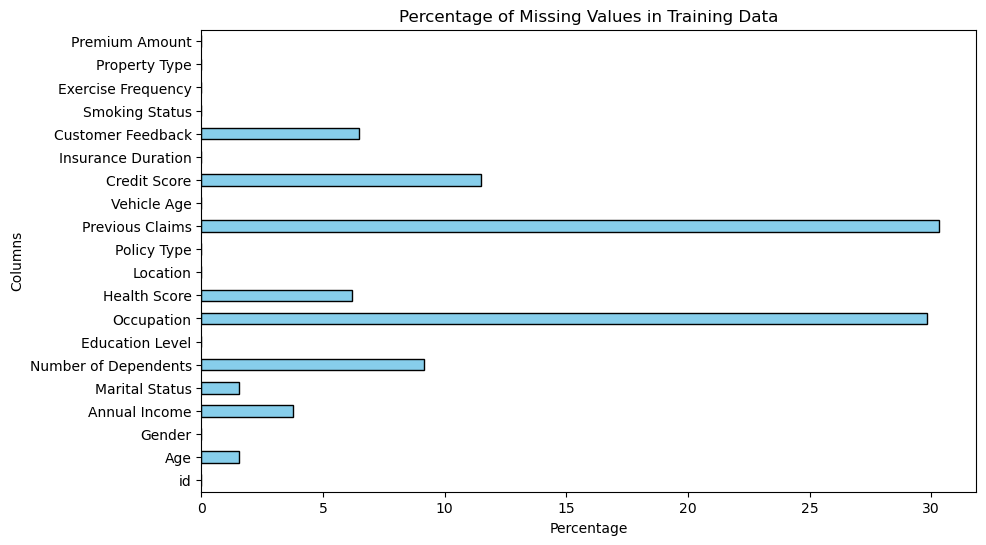

In [24]:
# Plot for training data
plot_missing_percentage(train_missing_percentage, title="Percentage of Missing Values in Training Data")

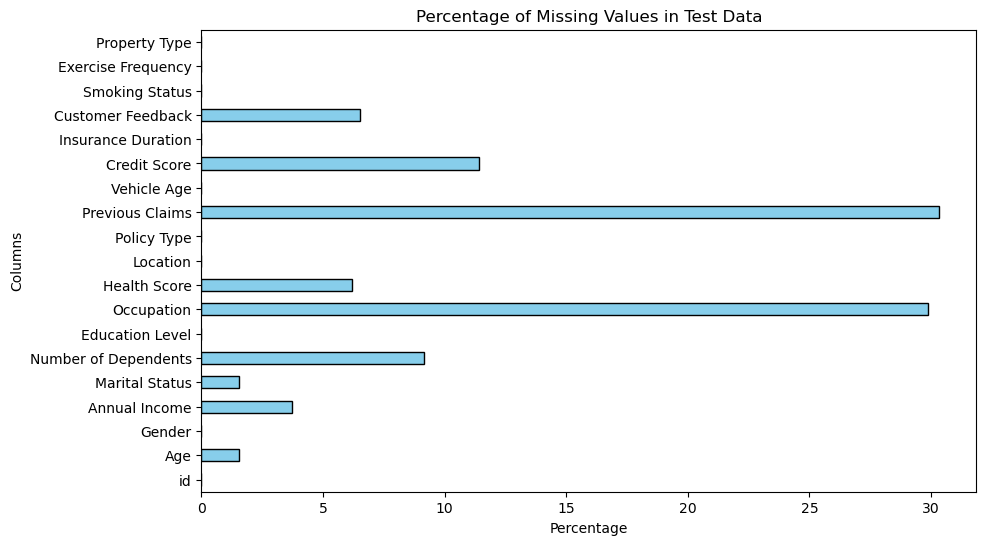

In [25]:
# Plot for test data
plot_missing_percentage(test_missing_percentage, title="Percentage of Missing Values in Test Data")

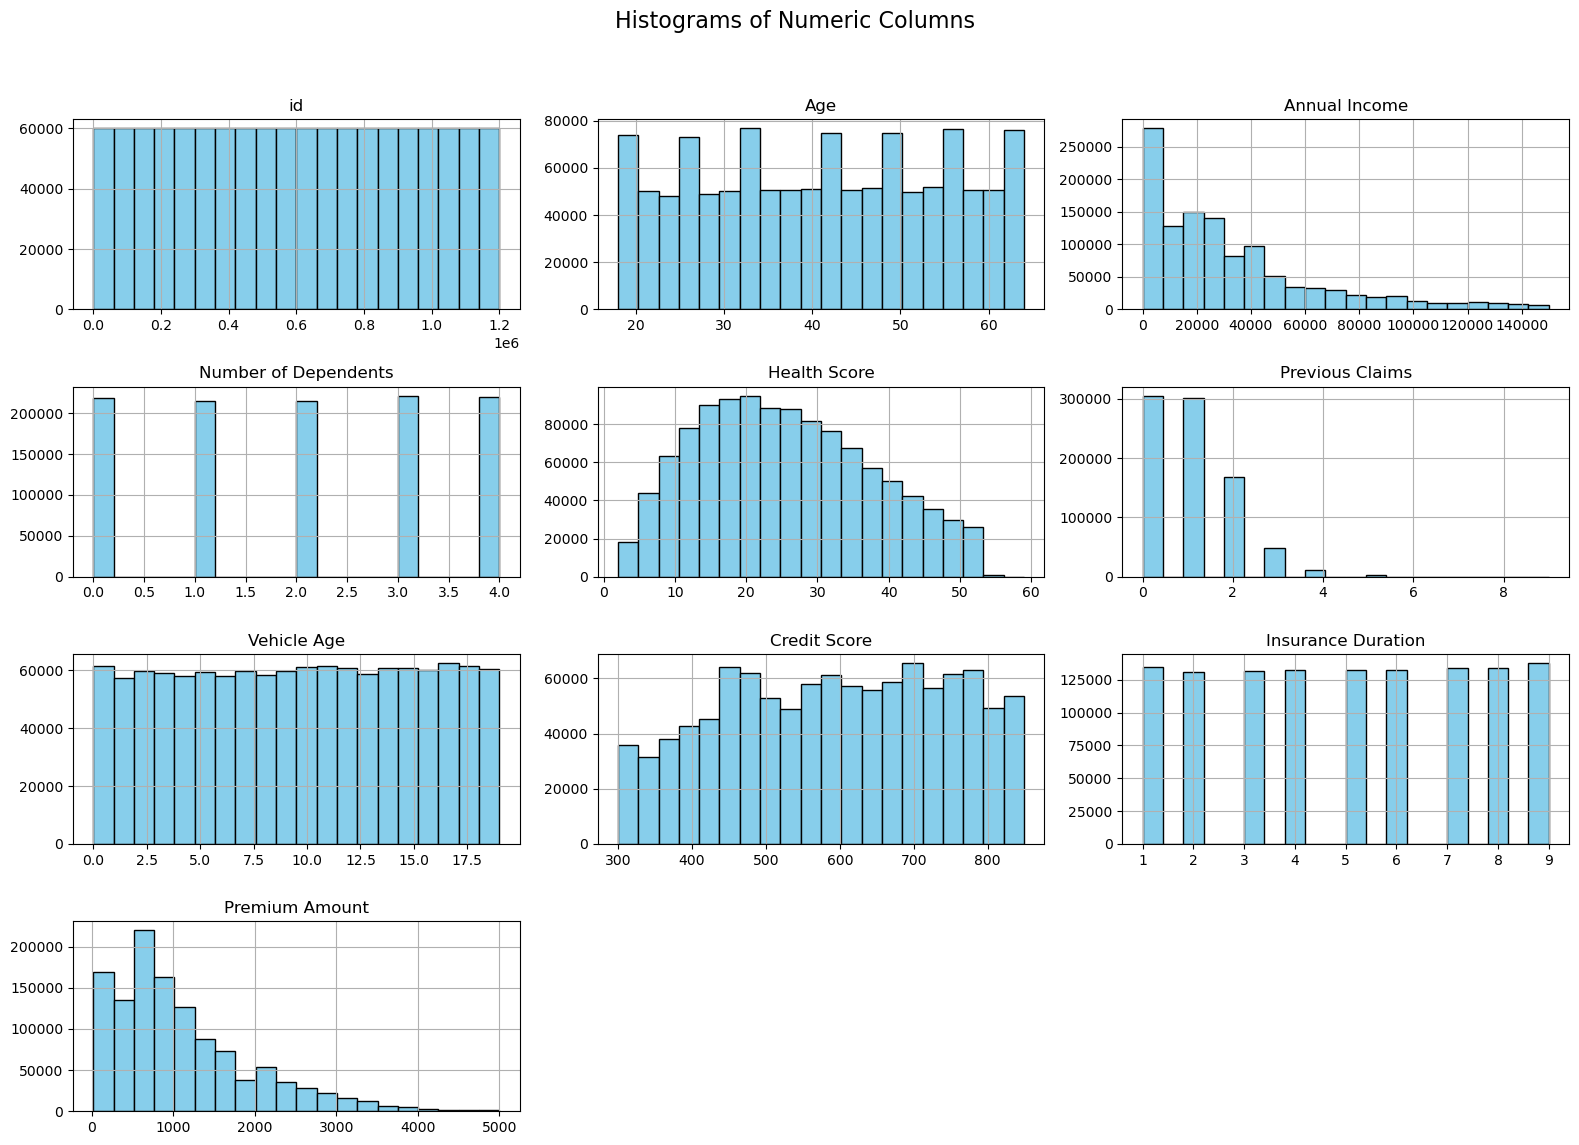

In [26]:
numerical_col = train_set.select_dtypes(include=['number']).columns  # Select only numeric columns
train_set[numerical_col].hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
plt.show()

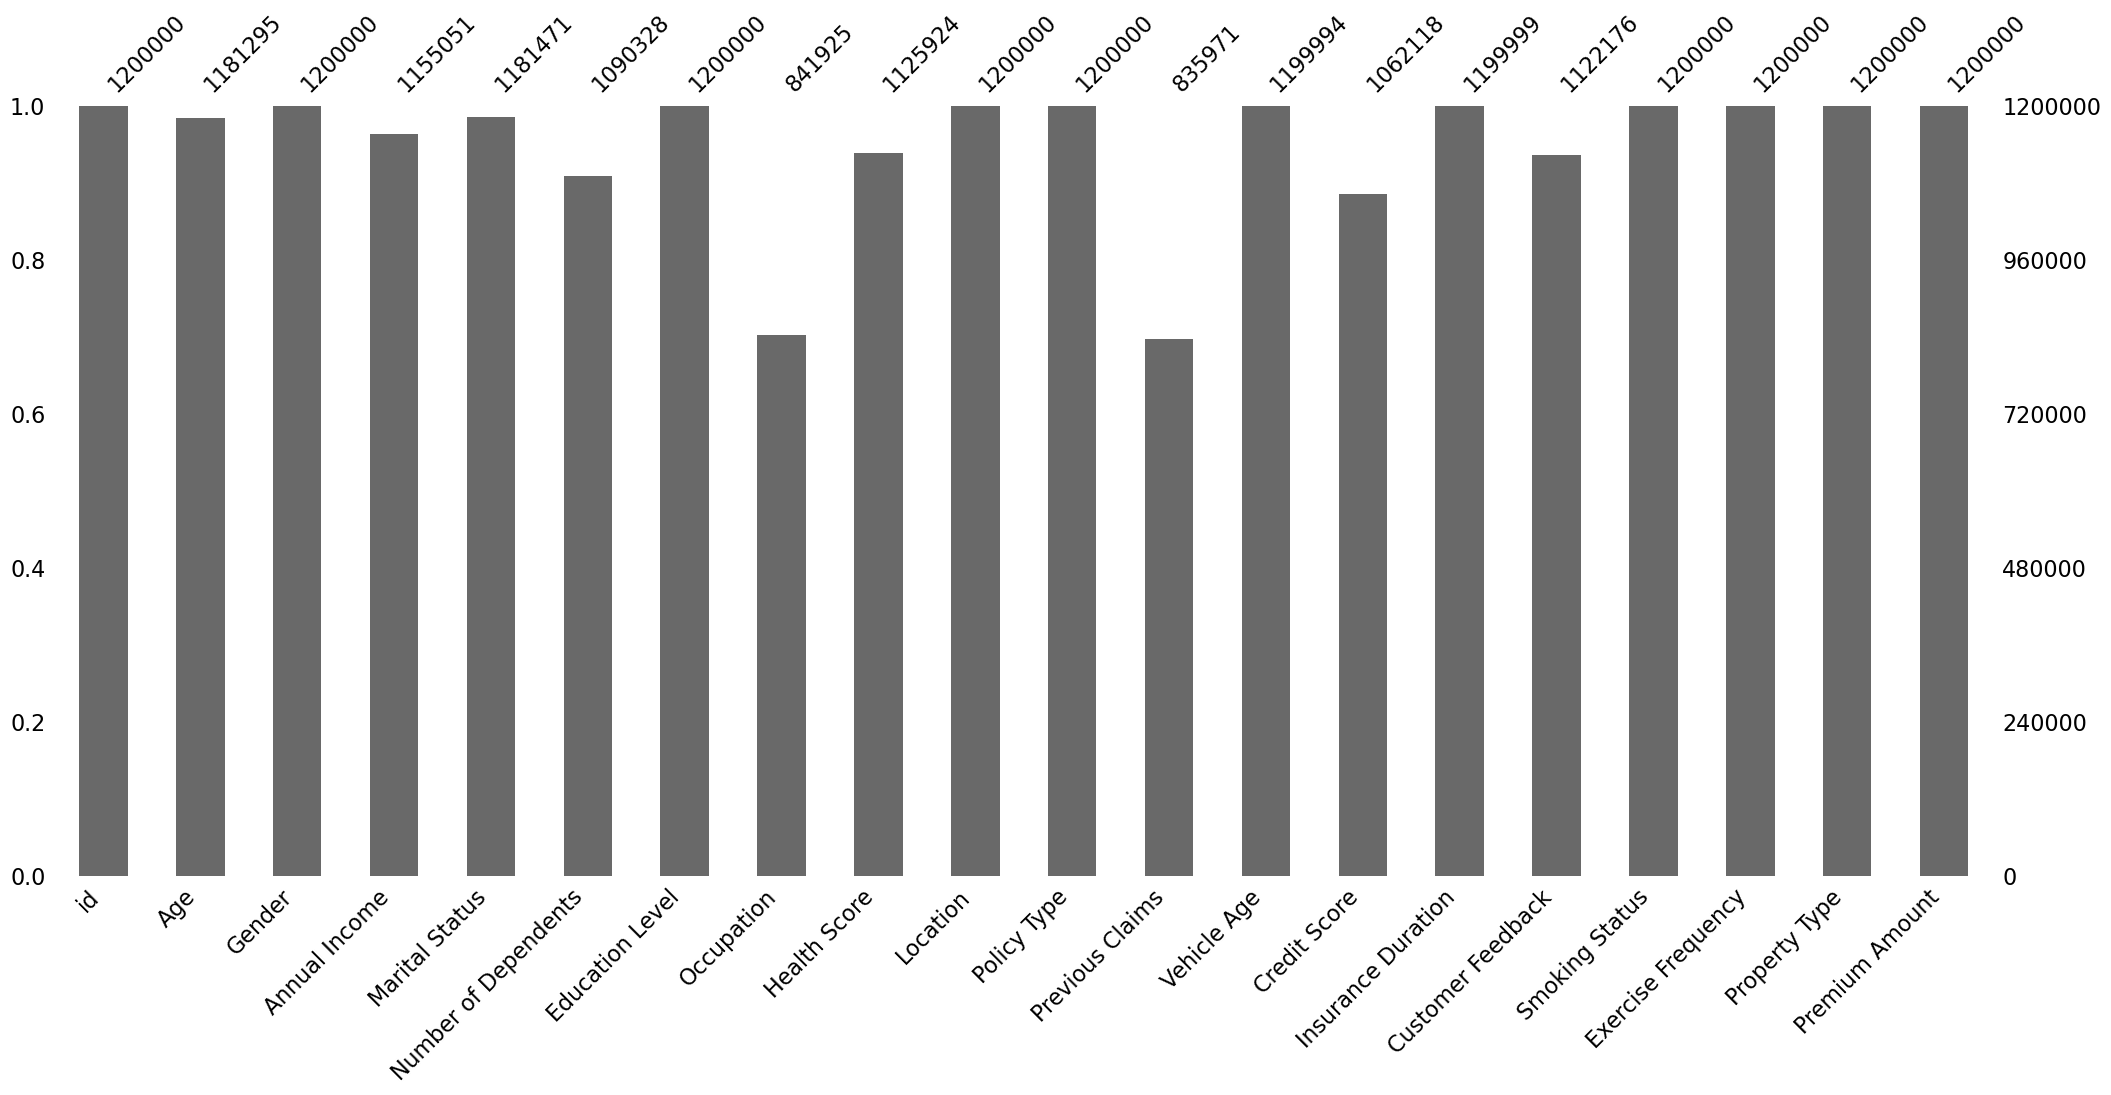

In [27]:
!pip install missingno
import missingno as msno
msno.bar(train_set)
plt.show()

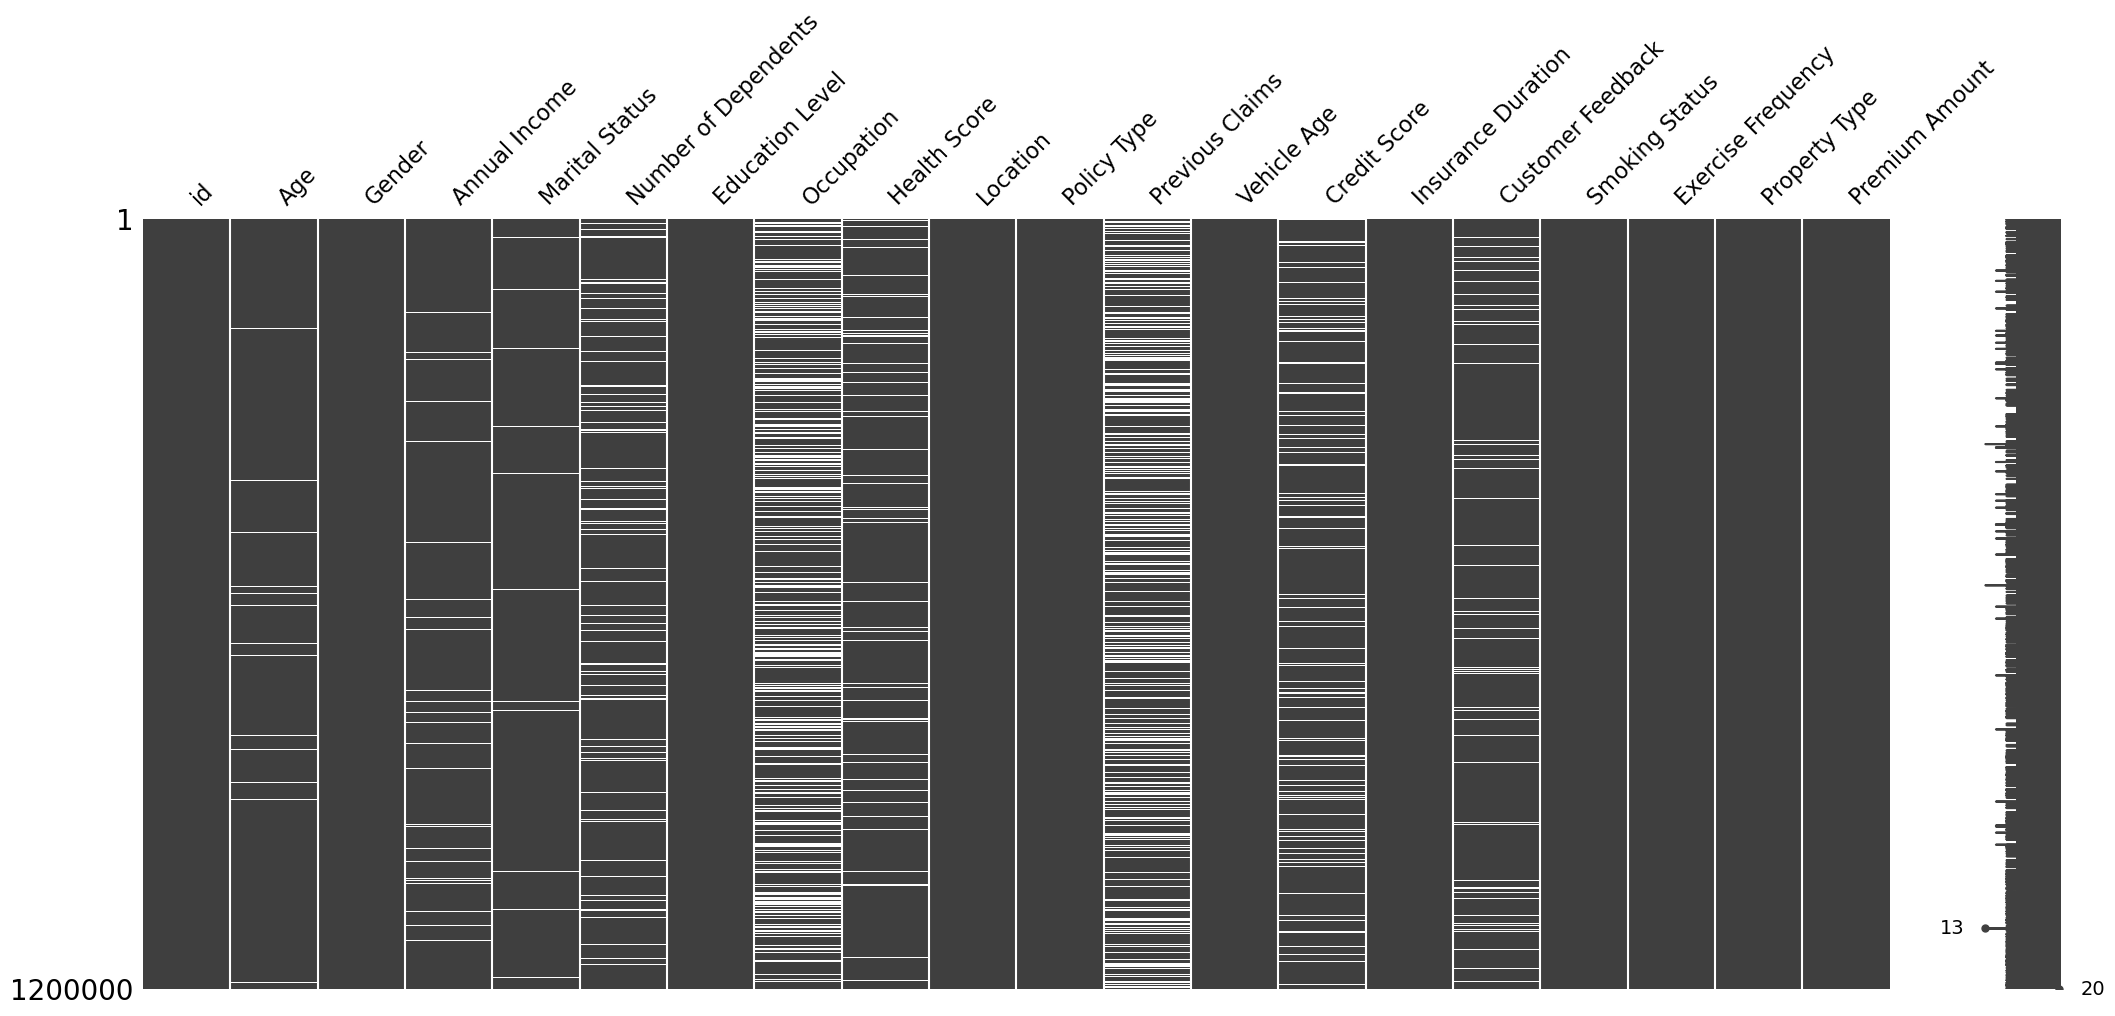

In [28]:
msno.matrix(train_set)
plt.show()

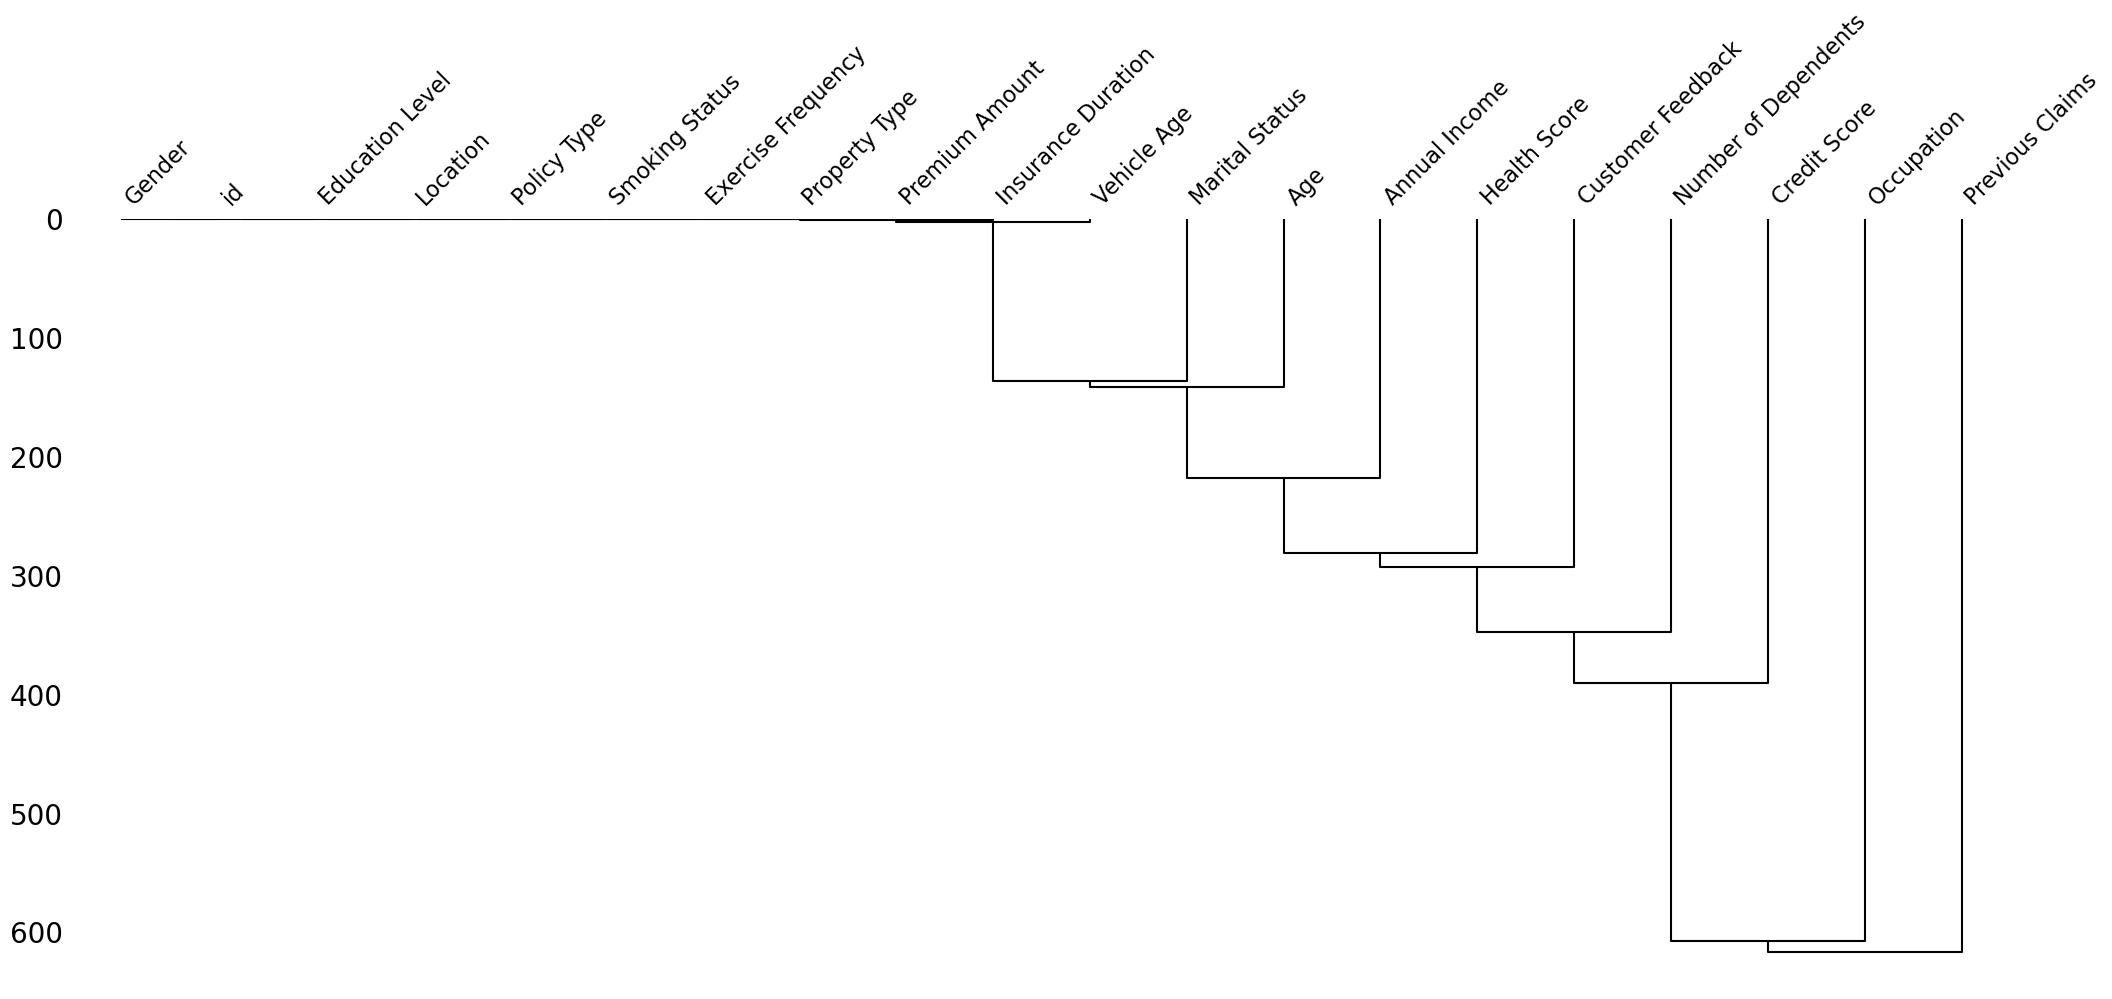

In [29]:
msno.dendrogram(train_set)
plt.show()

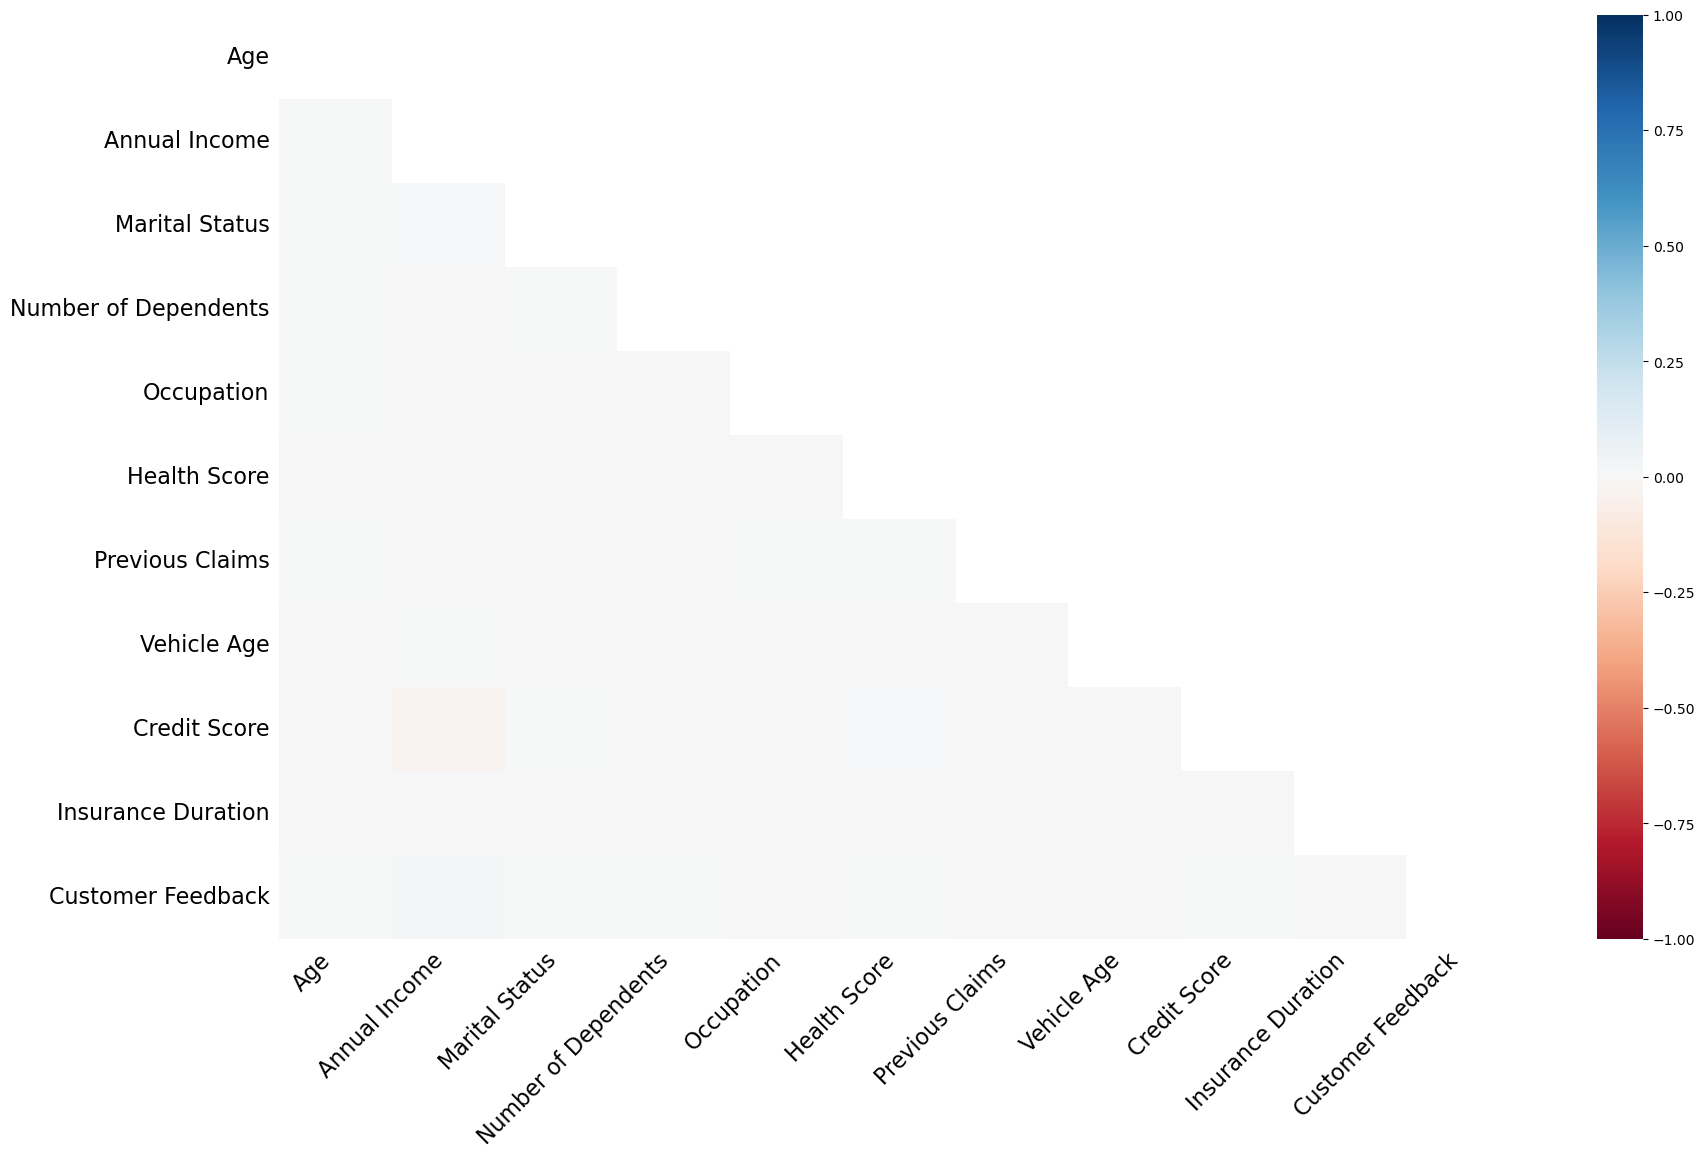

In [30]:
msno.heatmap(train_set)
plt.show()
#low corelations means MAR

In [31]:
# relation related column - > Annual Income , Health Score , Previous Claims(*) , Credit Score 
numerical_columns = train_set.select_dtypes(exclude=['object']).columns


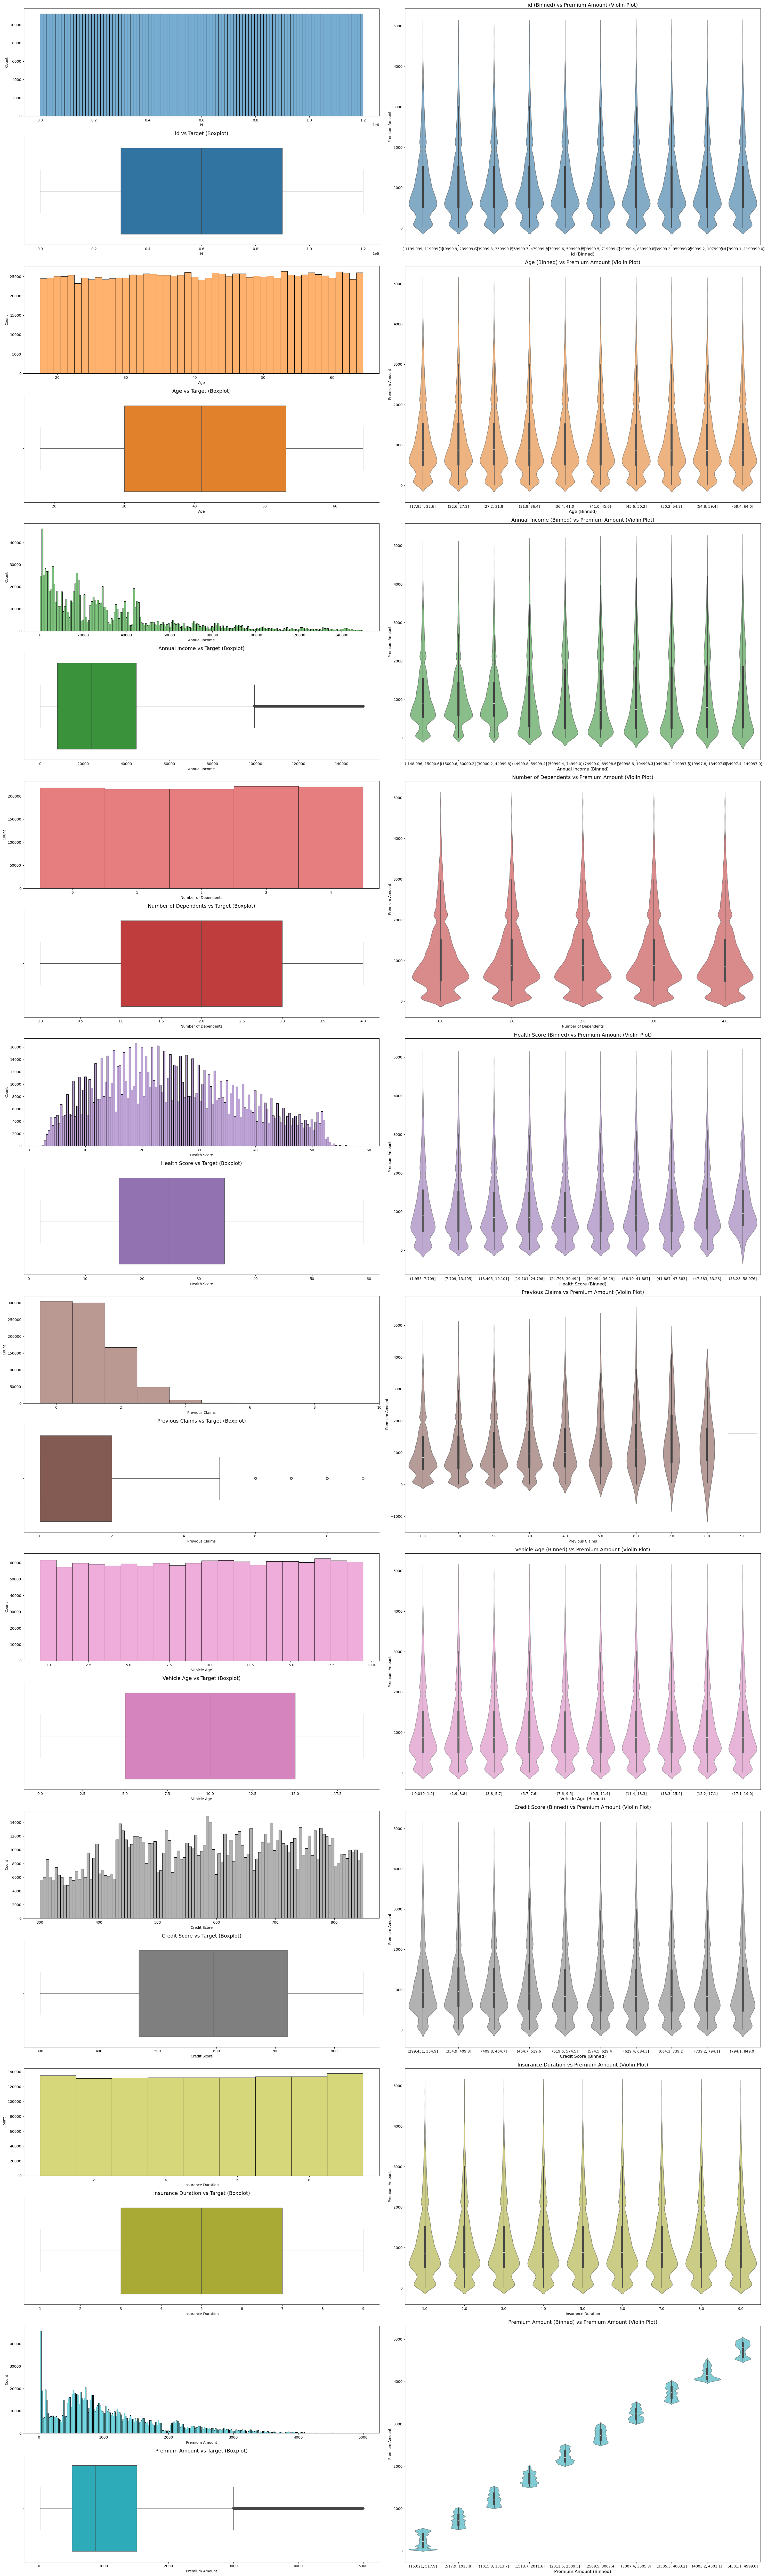

In [32]:
# Create a color palette for the columns
import seaborn as sns
import matplotlib.gridspec as gridspec

palette = sns.color_palette('tab10', len(numerical_columns))
color_dict = dict(zip(numerical_columns, palette))
target_column = 'Premium Amount'

# Create a grid of subplots for histograms, boxplots, and scatterplots/violin plots
fig = plt.figure(figsize=(30, 10 * len(numerical_columns)))
gs = gridspec.GridSpec(2 * len(numerical_columns), 2, figure=fig)

df_binned = train_set.copy()

for i, column in enumerate(numerical_columns):

    if train_set[column].nunique() > 50: discrete = False
    else : discrete = True
    
    # Plot histogram with a unique color
    ax_hist = fig.add_subplot(gs[2 * i, 0])
    sns.histplot(
        data=train_set, x=column, fill=True, common_norm=False, alpha=0.6,
        linewidth=0.8, color=color_dict[column], ax=ax_hist,  discrete = discrete
    )
    
    # Plot boxplot with the same unique color
    ax_box = fig.add_subplot(gs[2 * i + 1, 0])
    sns.boxplot(data=train_set, x=column, ax=ax_box, color=color_dict[column])
    ax_box.set_title(f'{column} vs Target (Boxplot)', fontsize=14)
    sns.despine(ax=ax_box)

    # Conditional plot: violin plot or barplot based on unique values, fallback to scatterplot
    ax_conditional = fig.add_subplot(gs[2 * i:2 * i + 2, 1])  # Merges 2 rows
    if train_set[column].nunique() <= 10:
        # If the column has 10 or fewer unique values, use a violin plot
        sns.violinplot(data=train_set, x=column, y=target_column, ax=ax_conditional, color=color_dict[column], alpha=0.6)
        ax_conditional.set_title(f'{column} vs {target_column} (Violin Plot)', fontsize=14)
    else:
        # Bin the column into 10 intervals, but keep original target column values
        df_binned['Binned Column'] = pd.cut(train_set[column], bins=10)
        sns.violinplot(data=df_binned, x='Binned Column', y=target_column, ax=ax_conditional, color=color_dict[column], alpha=0.6)
        ax_conditional.set_title(f'{column} (Binned) vs {target_column} (Violin Plot)', fontsize=14)
        ax_conditional.set_xlabel(f'{column} (Binned)', fontsize=12)

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

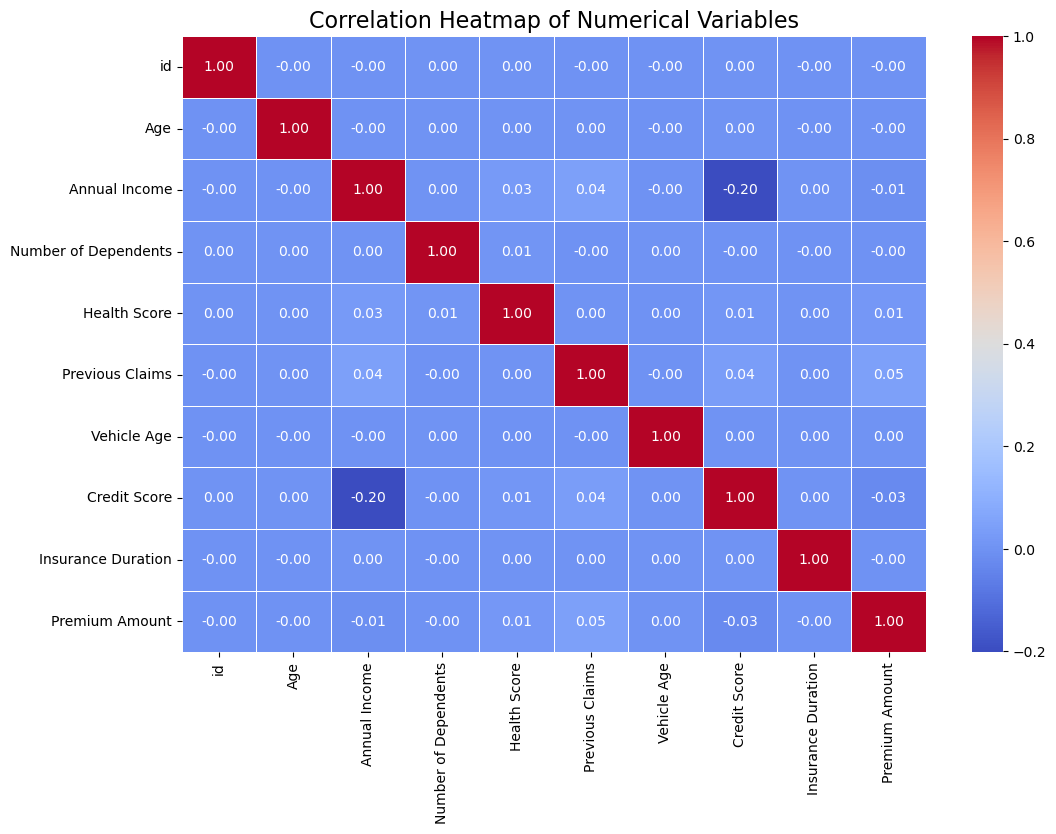

In [33]:
correlation_matrix = train_set[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()
#no high correlation between any columns

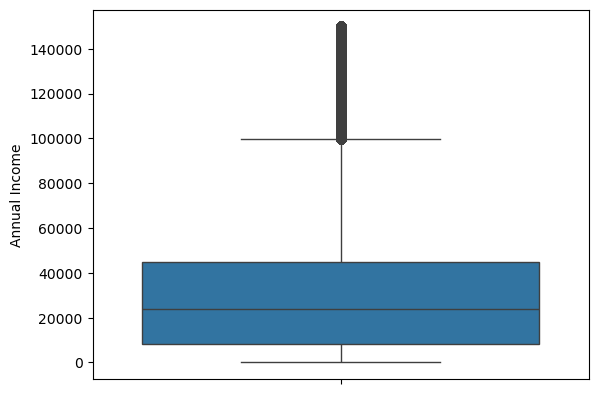

In [34]:
sns.boxplot(train_set['Annual Income'])
plt.show()

In [35]:
(train_set['Annual Income']>=100000).sum()

66591

In [36]:
def countP(arr):
    for i in arr:
        sns.countplot(data=train_set,x=i)
        plt.show()

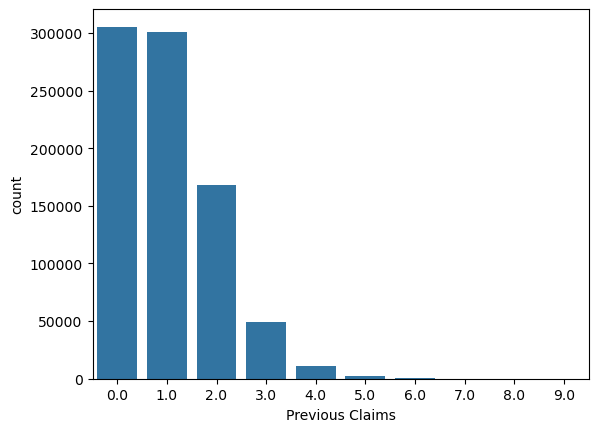

In [37]:
countP(['Previous Claims'])

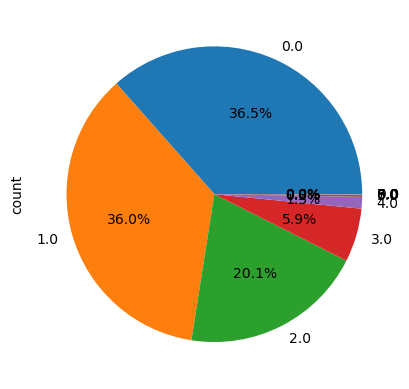

In [38]:
train_set['Previous Claims'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

In [39]:
def scatter(arr):
    for i in arr:
        sns.scatterplot(data=train_set,x='Premium Amount',y=i)
        plt.show()

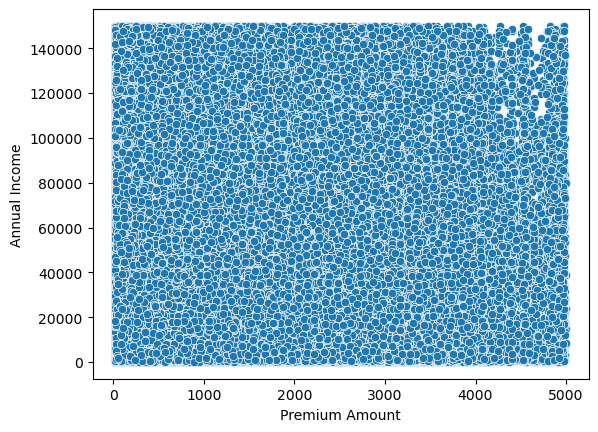

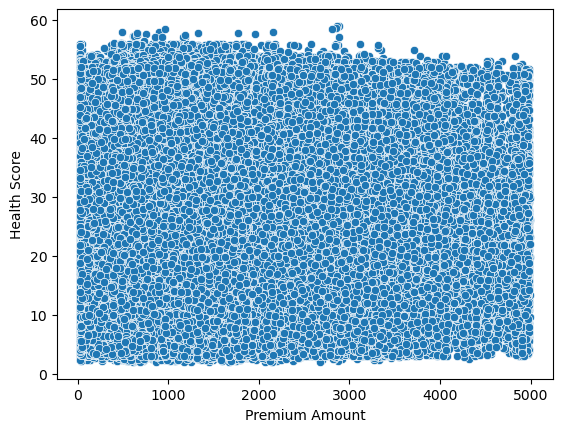

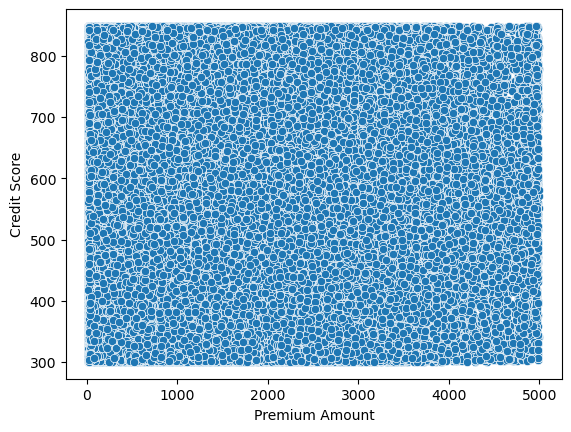

In [40]:
scatter(['Annual Income','Health Score','Credit Score'])

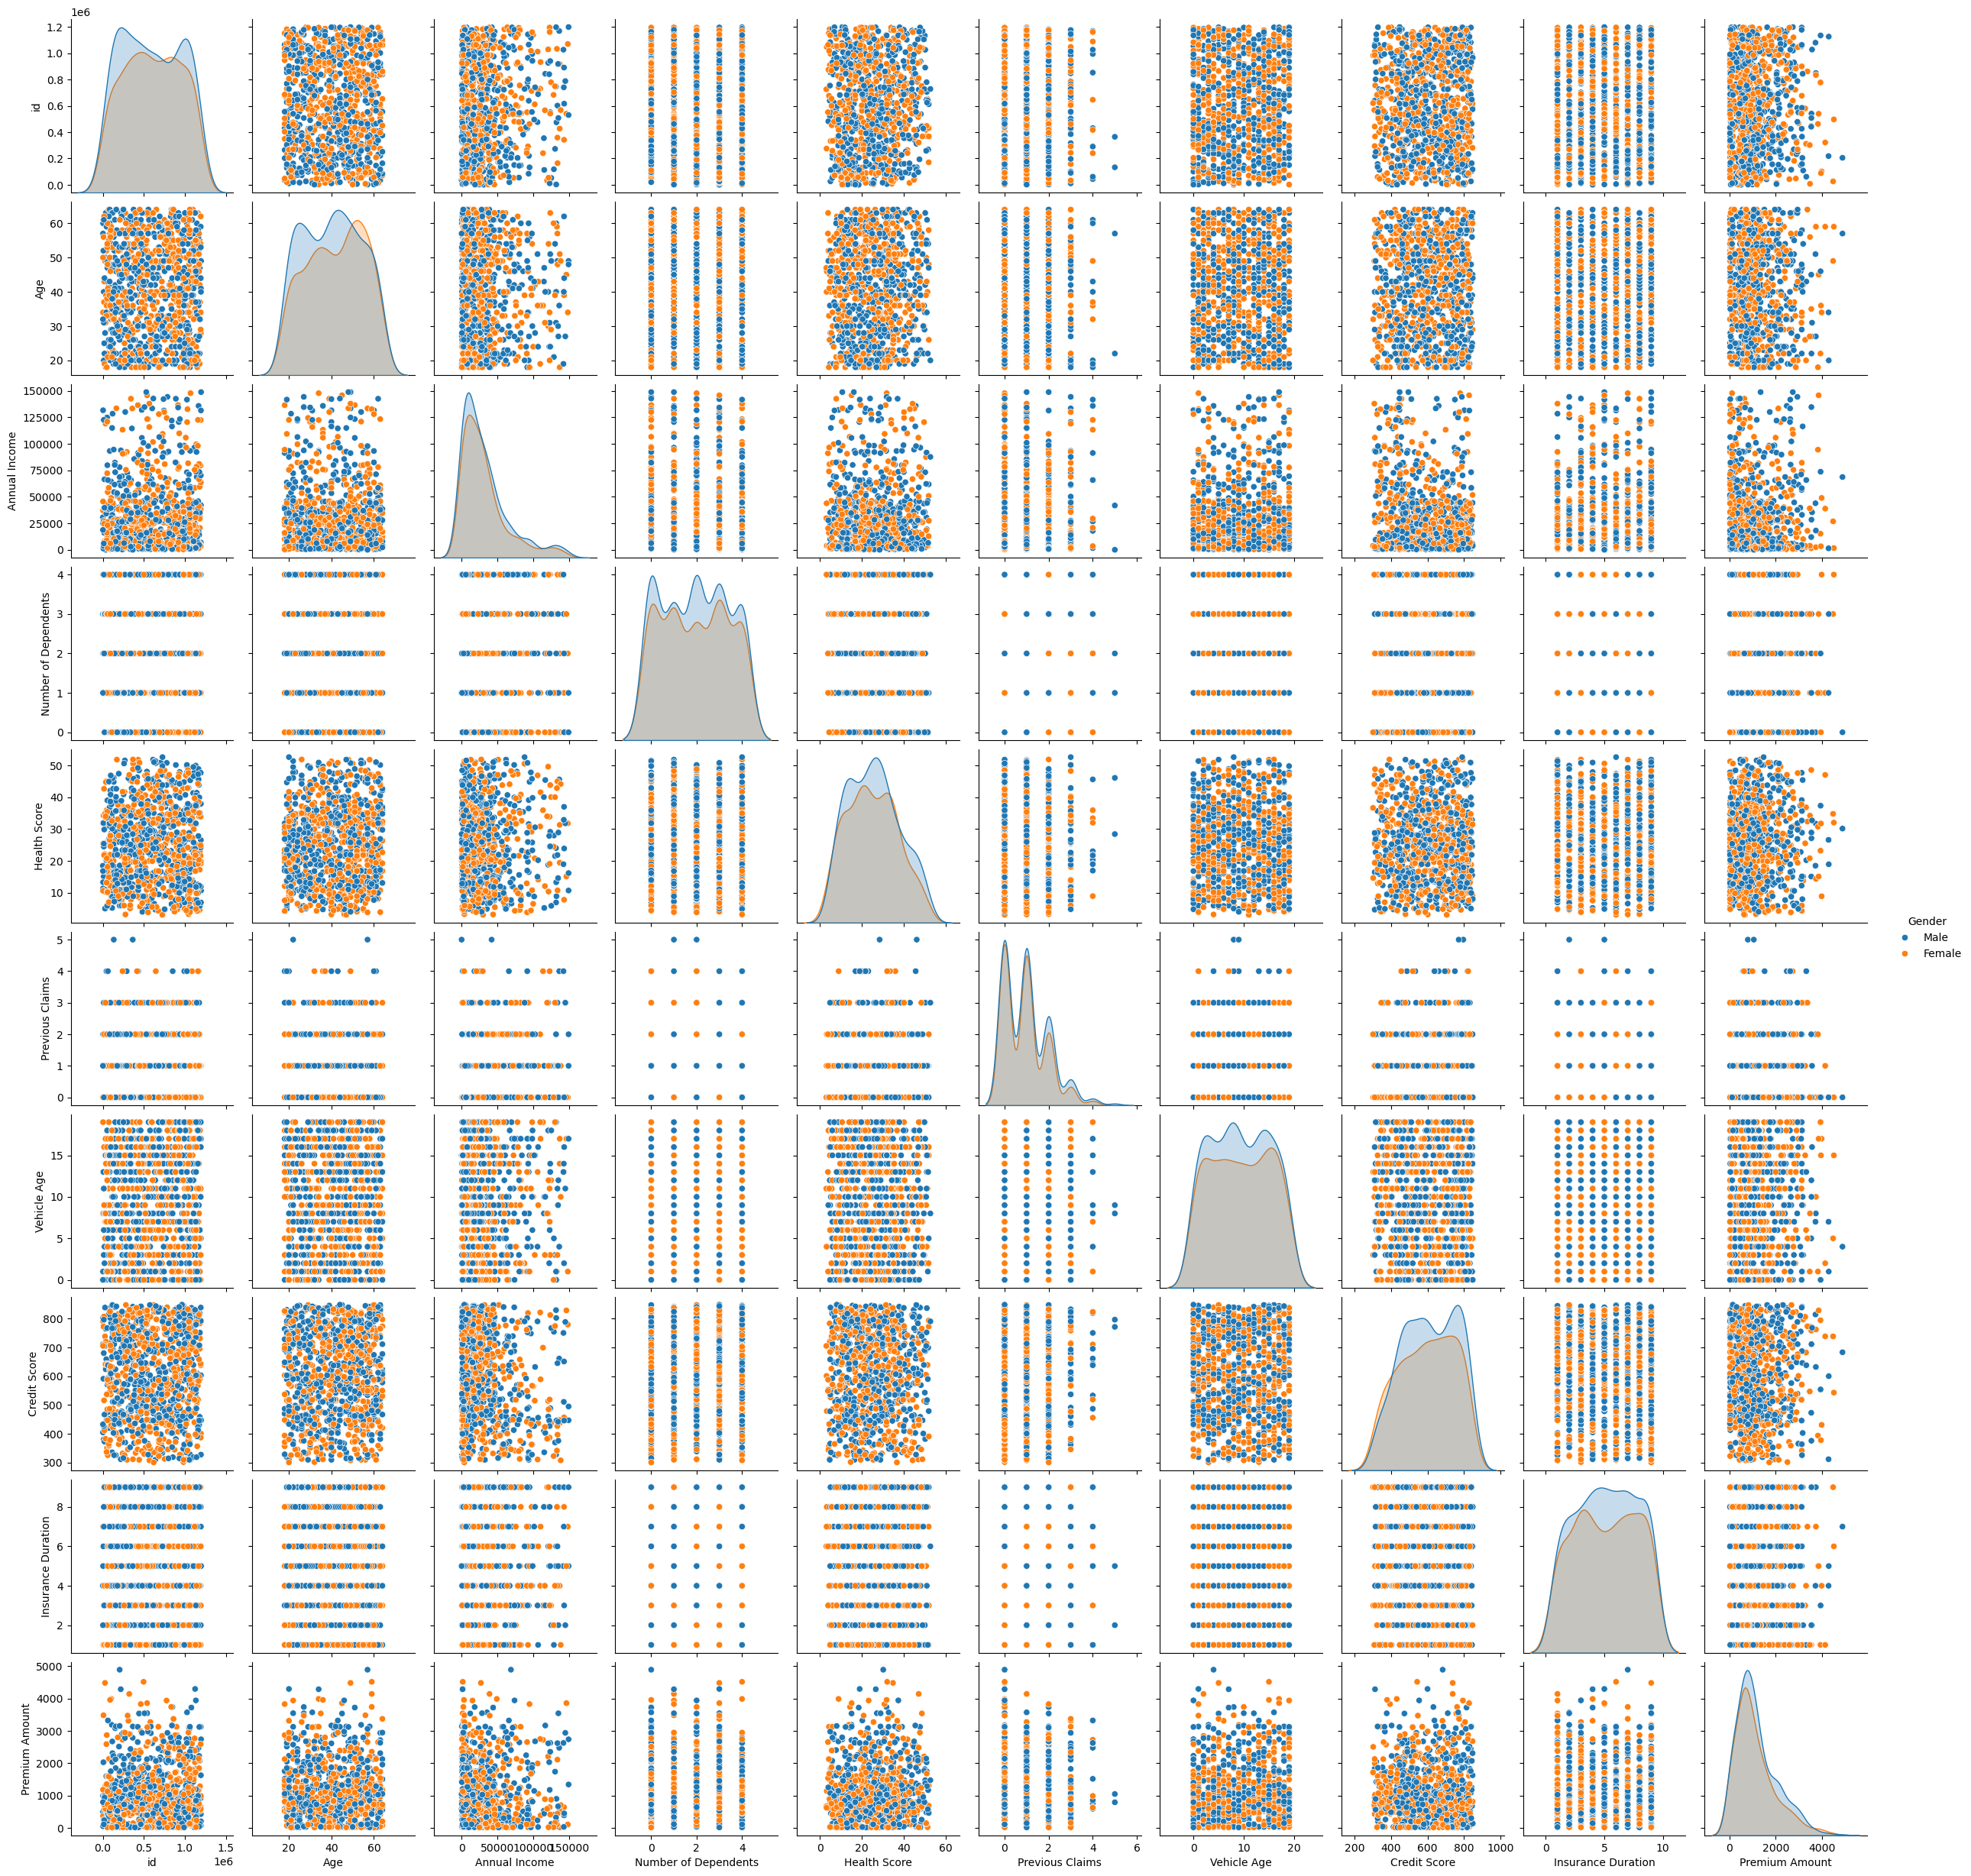

In [41]:
temp_df = train_set.dropna().sample(1000)
sns.pairplot(temp_df,hue='Gender')
plt.show()

In [42]:
#numerical missing < 5% ->  age,Annual income 
#categorical missing < 5% -> marital status
#numerical missing > 5% ->  number of dependencies , health score, credit score , previous claim
#categorical missing > 5% -> occupation

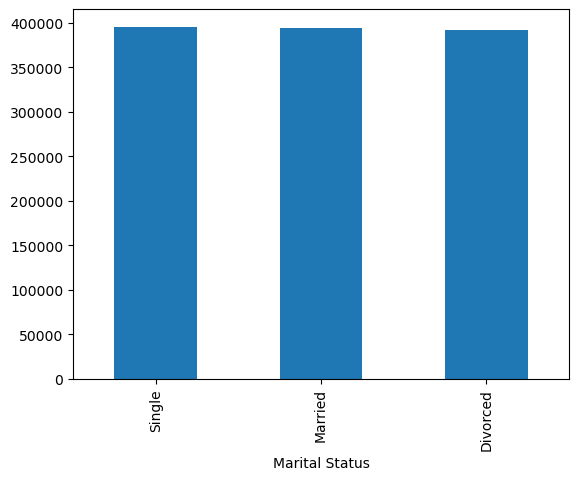

In [43]:
train_set['Marital Status'].value_counts().plot(kind='bar')
plt.show()

<!-- DATA PREPROCESSING -->

<!-- DATA PREPROCESSING -->

#DATA PREPROCESSING 

1. OUTLIER DETECTION

In [44]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [45]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in numerical_columns:
    if col != "Premium Amount":
      print(col, check_outlier(train_set, col))#looks good

id False
Age False
Annual Income False
Number of Dependents False
Health Score False
Previous Claims True
Vehicle Age False
Credit Score False
Insurance Duration False


In [46]:
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [47]:
train_df=train_set.drop('id',axis=1)

In [48]:
numerical_columns= train_df.select_dtypes(exclude=['object']).columns
numerical_columns= numerical_columns.drop('Premium Amount')
categorical_columns= train_df.select_dtypes(include=['object']).columns

In [49]:
numerical_columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object')

In [50]:
categorical_columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Customer Feedback     1122176 non-

In [52]:
num_indexes=[0,2,4,7,10,11,12,13]
cat_indexes=[1,3,5,6,8,11,14,15,16,17]

In [53]:
for i in num_indexes:
    print(train_df.columns[i])

Age
Annual Income
Number of Dependents
Health Score
Previous Claims
Vehicle Age
Credit Score
Insurance Duration


In [54]:
numerical_columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object')

In [55]:
for i in cat_indexes:
    print(train_df.columns[i])

Gender
Marital Status
Education Level
Occupation
Location
Vehicle Age
Customer Feedback
Smoking Status
Exercise Frequency
Property Type


In [56]:
categorical_columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [57]:
#Handling missing values

trf1=ColumnTransformer( [
    ('impute_numerical_columns',SimpleImputer(strategy='median'),num_indexes),
    ('impute_categorical_columns',SimpleImputer(strategy='constant', fill_value='Unknown'),cat_indexes),
])

In [58]:
#Scaling the values
# trf2 =ColumnTransformer([
#      ('scaler', StandardScaler(),num_indexes)
#  ])

In [59]:
#One_hot_encoding
trf3=ColumnTransformer(  transformers=[
    ('onehot', OneHotEncoder(sparse_output=True,handle_unknown='ignore'),cat_indexes)
])

In [60]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [61]:
x_train , x_test , y_train , y_test = train_test_split(train_df.drop('Premium Amount',axis=1),train_df['Premium Amount'] ,test_size=0.3,random_state=2)

In [62]:
x_train.shape

(840000, 18)

In [65]:
#model 1 
trf4=LinearRegression()

# creating pipeline 
pipe = Pipeline(steps=[
    ('trf1',trf1),
    # ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

r2_score(y_test,y_pred)

-0.27069373485713255

In [ ]:
# #model 2
# trf4=RandomForestRegressor(n_estimators=10)
# pipe = Pipeline(steps=[
#     ('trf1',trf1),
#     # ('trf2',trf2),
#     ('trf3',trf3),
#     ('trf4',trf4)
# ])

# pipe.fit(x_train,y_train)

# y_pred = pipe.predict(x_test)

# r2_score(y_test,y_pred)

In [64]:
#model 3
trf4 = XGBRegressor(n_estimators=1000, max_depth=6, learning_rate=0.1)

pipe = Pipeline(steps=[
    ('trf1',trf1),
    # ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

r2_score(y_test,y_pred)

0.011528720741108667